In [1]:
import pathlib
import numpy as np

# turn our training path into a Python path
data_dir = pathlib.Path("train/")

# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['bruschetta' 'french_onion_soup' 'paella']


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "test/"
test_dir = "train/"

In [3]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


# 1. CNN model

## 1.1 Adam optimizer

In [4]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
24/24 [==============================] - 64s 3s/step - loss: 1.0831 - accuracy: 0.4027 - val_loss: 1.0276 - val_accuracy: 0.4844
Epoch 2/2
24/24 [==============================] - 61s 3s/step - loss: 0.9846 - accuracy: 0.5267 - val_loss: 0.9674 - val_accuracy: 0.5067


In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [6]:
model_1.evaluate(valid_data)

8/8 [==============================] - 6s 678ms/step - loss: 0.9674 - accuracy: 0.5067


[0.9673768877983093, 0.5066666603088379]

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

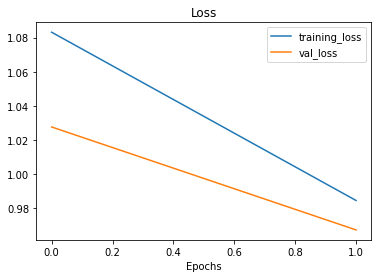

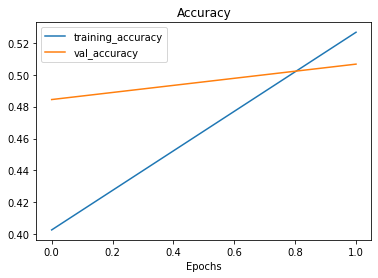

In [8]:
plot_loss_curves(history_1)

## 1.2 SGD optimizer

In [9]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
24/24 [==============================] - 55s 2s/step - loss: 1.1113 - accuracy: 0.3200 - val_loss: 1.0817 - val_accuracy: 0.3422
Epoch 2/2
24/24 [==============================] - 55s 2s/step - loss: 1.0705 - accuracy: 0.4253 - val_loss: 1.0499 - val_accuracy: 0.5022


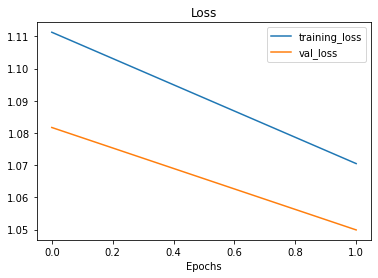

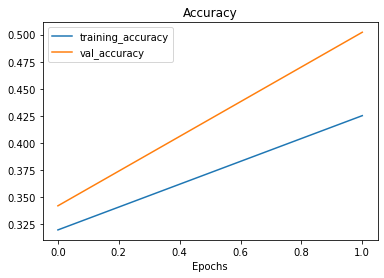

In [10]:
plot_loss_curves(history_2)

# 2. ResNet101 model

## 2.1 Adam optimizer

In [11]:
model_2=tf.keras.applications.ResNet101(include_top=False)
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_resnet=tf.keras.Model(inputs,outputs)

171458560/171446536 [==============================] - 18s 0us/step


In [12]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [13]:
history_resnet_adam =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 276s 11s/step - loss: 1.1454 - accuracy: 0.3160 - val_loss: 1.0983 - val_accuracy: 0.3556
Epoch 2/2
24/24 [==============================] - 184s 8s/step - loss: 1.0842 - accuracy: 0.4013 - val_loss: 1.0735 - val_accuracy: 0.3867


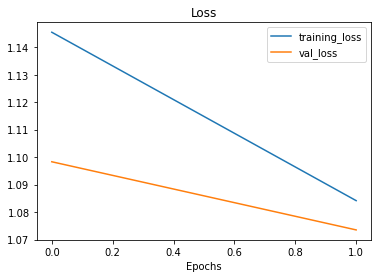

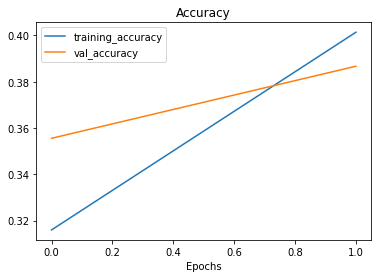

In [14]:
plot_loss_curves(history_resnet_adam)

In [15]:
model_resnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048)  42658176  
                                                                 
 gap_layer (GlobalAveragePoo  (None, 2048)             0         
 ling2D)                                                         
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_________________________________________________________________


## fine-tune resnet model

In [16]:
for layer in model_2.layers[-10:]:
    layer.trainable=True

In [17]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [18]:
history_resnet_adam_1 =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 191s 8s/step - loss: 1.0319 - accuracy: 0.4493 - val_loss: 1.0646 - val_accuracy: 0.3956
Epoch 2/2
24/24 [==============================] - 169s 7s/step - loss: 0.9574 - accuracy: 0.5547 - val_loss: 1.0435 - val_accuracy: 0.4444


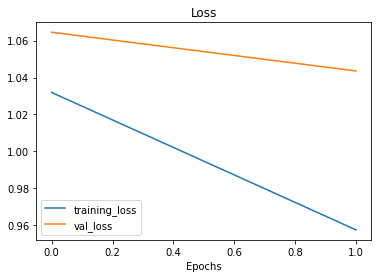

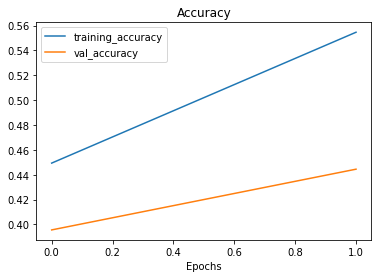

In [19]:
plot_loss_curves(history_resnet_adam_1)

## 2.2 SGD

In [20]:
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)
model_resnet=tf.keras.Model(inputs,outputs)

model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)

history_resnet_sgd =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 183s 7s/step - loss: 1.3078 - accuracy: 0.3840 - val_loss: 1.2302 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 174s 7s/step - loss: 1.5019 - accuracy: 0.3133 - val_loss: 1.1268 - val_accuracy: 0.3644


Результати гірші, ніж з Адамом

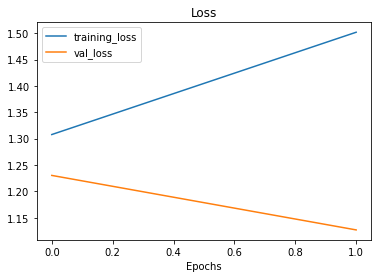

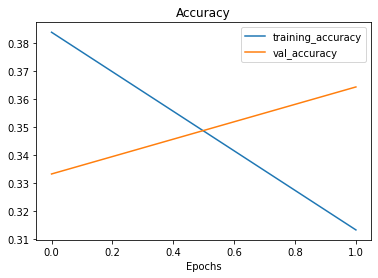

In [21]:
plot_loss_curves(history_resnet_sgd)

# 3. Efficient model

## 3.1 Adam

In [22]:
model_3=tf.keras.applications.EfficientNetB0(include_top=False)
model_3.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_3(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

16719872/16705208 [==============================] - 2s 0us/step


In [23]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [24]:
# model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_efficient_adam =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 55s 2s/step - loss: 1.1036 - accuracy: 0.3240 - val_loss: 1.1021 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 50s 2s/step - loss: 1.1046 - accuracy: 0.3280 - val_loss: 1.0984 - val_accuracy: 0.3644


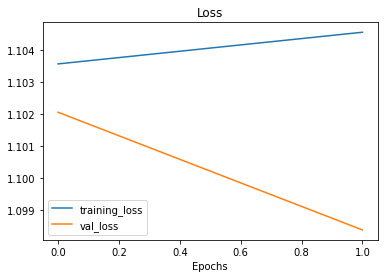

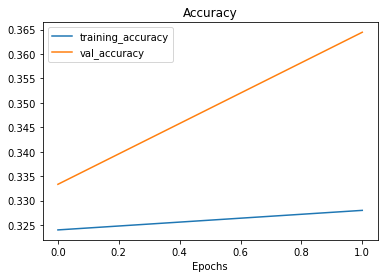

In [25]:
plot_loss_curves(history_efficient_adam)

In [26]:
for layer in model_3.layers[-10:]:
    layer.trainable=True

In [27]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

In [28]:
model_trainable_layers(model_3)

0 input_2 False 0
1 rescaling False 0
2 normalization False 0
3 stem_conv_pad False 0
4 stem_conv False 0
5 stem_bn False 0
6 stem_activation False 0
7 block1a_dwconv False 0
8 block1a_bn False 0
9 block1a_activation False 0
10 block1a_se_squeeze False 0
11 block1a_se_reshape False 0
12 block1a_se_reduce False 0
13 block1a_se_expand False 0
14 block1a_se_excite False 0
15 block1a_project_conv False 0
16 block1a_project_bn False 0
17 block2a_expand_conv False 0
18 block2a_expand_bn False 0
19 block2a_expand_activation False 0
20 block2a_dwconv_pad False 0
21 block2a_dwconv False 0
22 block2a_bn False 0
23 block2a_activation False 0
24 block2a_se_squeeze False 0
25 block2a_se_reshape False 0
26 block2a_se_reduce False 0
27 block2a_se_expand False 0
28 block2a_se_excite False 0
29 block2a_project_conv False 0
30 block2a_project_bn False 0
31 block2b_expand_conv False 0
32 block2b_expand_bn False 0
33 block2b_expand_activation False 0
34 block2b_dwconv False 0
35 block2b_bn False 0
36 bloc

In [29]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [30]:
history_efficient_adam_1 =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 52s 2s/step - loss: 1.1244 - accuracy: 0.3333 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 43s 2s/step - loss: 1.1315 - accuracy: 0.3213 - val_loss: 1.1008 - val_accuracy: 0.3333


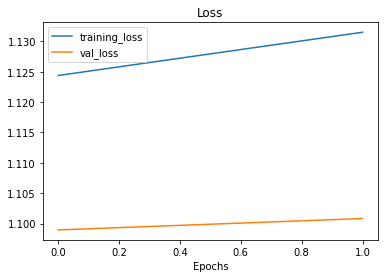

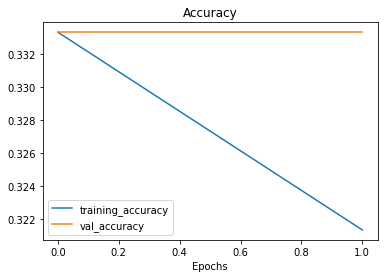

In [31]:
plot_loss_curves(history_efficient_adam_1)

Дає результати трохи гірші, ніж untrainable

# SGD

In [32]:
model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 53s 2s/step - loss: 1.0968 - accuracy: 0.3387 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 44s 2s/step - loss: 1.1006 - accuracy: 0.3280 - val_loss: 1.0989 - val_accuracy: 0.3244


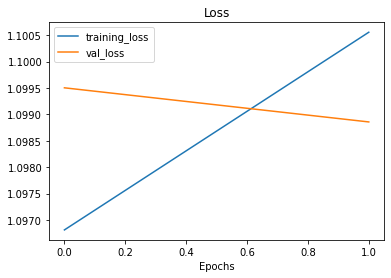

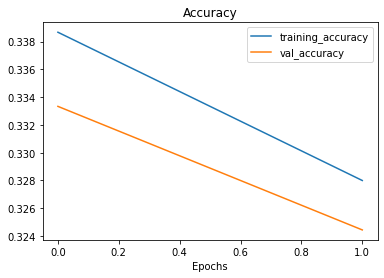

In [33]:
plot_loss_curves(history_efficient_sgd)

## Usage of EfficientNetB4 instead of EfficientNetB0

In [34]:
model_4=tf.keras.applications.EfficientNetB4(include_top=False)
model_4.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_4(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

71696384/71686520 [==============================] - 7s 0us/step


In [35]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [36]:
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        validation_data=valid_data)

Epoch 1/2
24/24 [==============================] - 140s 5s/step - loss: 1.1294 - accuracy: 0.3280 - val_loss: 1.1002 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 126s 5s/step - loss: 1.1074 - accuracy: 0.3240 - val_loss: 1.0989 - val_accuracy: 0.3333


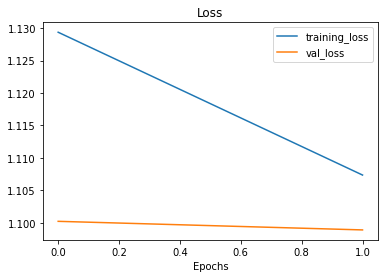

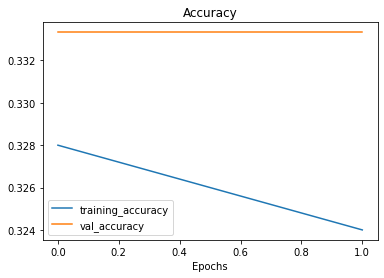

In [37]:
plot_loss_curves(history_efficient_sgd)

Отже, ми порівняли декілька нейронних моделей на однаковому наборі даних. Результати показали, що найкраще з задачею мультикласової класифікації справилась CNN модель з оптимізатором Адам (SGD давав гірші результати для всіх моделей). Щось дивне відбувалось з моделями РесНет та Ефішенсі, тому що, коли в першій частині лабораторної роботи ми формувалм модель з посилання, то результати вони показувати гарні, але конфьюжн матриця не відображала таких гарних результатів. До того ж, коли ми завантажуємо ці ж моделі і проводимо ті самі дії отримуємо вже точність нижчу. Окрім того, в якийсь момент точність на валідаційній вибірці стала 0.33 і перестала змінюватись (це не тільки для 2 епох: пробувала тренувати більше епох - все одно залишось 0.33 незмінним). 
Результати лаборатоної показали, що при проведенні файн-тюнінгу, то точність лише погіршувались або лишались незмінними. 